<a href="https://colab.research.google.com/github/Foco22/BECAS_MAGISTER/blob/master/AnalisisBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "camelot-py[cv]"

In [ ]:
!apt install python3-tk ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.13).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import camelot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# ***Exportacion y Preparacion de los datos***


In [ ]:
def extraccion_informacion():

    from google.colab import files
    uploaded = files.upload()  

    tables = camelot.read_pdf('RES_FALLO_MAG_7088_2019.pdf', pages='34-61')

    #Se exporta todos los archivos a un csv, para luego unirlos
    tables.export('puntajes_mg.csv', f='csv', compress=True)

    conteo_1 = 0
    for x in tables:
        conteo_1 = conteo_1 +1 
        x.to_csv('pagina {}.csv'.format(conteo_1)) 

    
    lista_dataframes = []
    archivos = 0
    for x in range(1,49):
        archivos = archivos +1 
        lista_dataframes.append('pagina {}.csv'.format(archivos))

    
    df = pd.DataFrame()
    for file in lista_dataframes:
         df = pd.concat([df, pd.read_csv(file)], ignore_index=True)
      
    return df

In [ ]:
df_datos = extraccion_informacion()

Saving RES_FALLO_MAG_7088_2019.pdf to RES_FALLO_MAG_7088_2019 (4).pdf


In [ ]:
df_datos.drop('Unnamed: 0', inplace = True, axis = 1)
df_datos.drop('Unnamed: 1', inplace = True, axis = 1)

# ***Analisis y Exploracion de los datos***



In [ ]:
df_datos.head()

,#,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,PUNTAJE
0,1.0,73200308.0,FEMENINO,AGUILAR PLAZA CAMILA ANDREA,FUERA DE BASES,NaN,NaN
1,2.0,73200230.0,FEMENINO,AGUILERA MOLINA FLORENCIA,FUERA DE BASES,NaN,NaN
2,3.0,73200353.0,MASCULINO,AGURTO SAEZ CRISTOBAL ANDRES,FUERA DE BASES,NaN,NaN
3,4.0,73200590.0,FEMENINO,ALARCON AVILA ANAIS NATALIA,FUERA DE BASES,NaN,NaN
4,5.0,73201192.0,MASCULINO,ALARCON ROJAS JAVIER EDUARDO,FUERA DE BASES,NaN,NaN


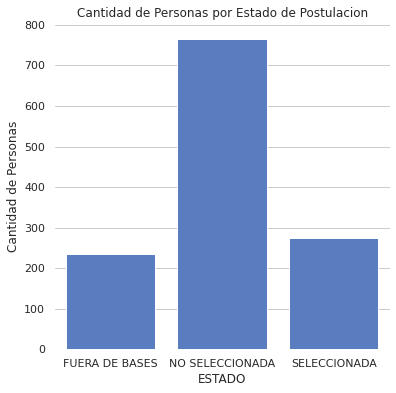

In [ ]:
plt.figure(figsize=(6,6))
sns.set_color_codes("muted")

sns.set_style('whitegrid')
g = sns.barplot(y="FOLIO", x="ESTADO", data=df_datos.groupby('ESTADO').count()['FOLIO'].reset_index(),
            label="SELECCIONADA", color="b")
plt.title('Cantidad de Personas por Estado de Postulacion')
plt.ylabel('Cantidad de Personas')
sns.despine(left=True, bottom=True)

In [ ]:
labels = list(df_datos.groupby('ESTADO').count()['FOLIO'].index)
labels
size = df_datos.groupby('ESTADO').count()['FOLIO'].values

array([234, 766, 275])

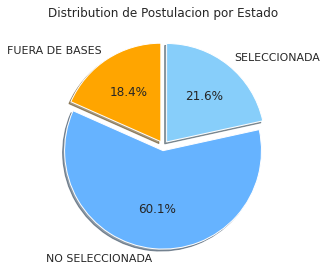

In [ ]:
# Pie chart
labels = list(df_datos.groupby('SEXO').count()['FOLIO'].index)
sizes = list(df_datos.groupby('SEXO').count()['FOLIO'].values)
#colors
colors = ['orange','#66b3ff','lightskyblue']
#explsion
explode = (0.05,0.05,0.05)
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution de Postulacion por Estado')
plt.tight_layout()
plt.show()


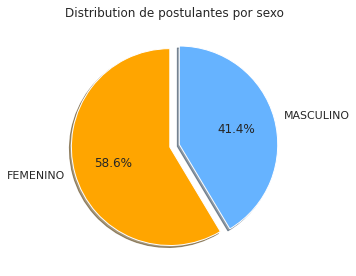

In [ ]:
# Pie chart
labels = list(df_datos.groupby('SEXO').count()['FOLIO'].index)
sizes = list(df_datos.groupby('SEXO').count()['FOLIO'].values)
#colors
colors = ['orange','#66b3ff']
#explsion
explode = (0.05,0.05)
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution de postulantes por sexo')
plt.tight_layout()
plt.show()

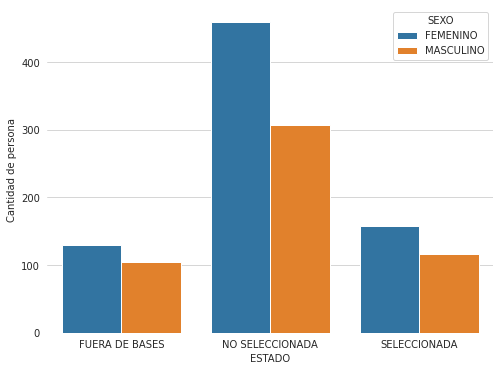

In [ ]:
plt.figure(figsize=(8,6))

sns.set_style('whitegrid')
sns.countplot(x= 'ESTADO', data = df_datos, hue = 'SEXO')
plt.ylabel('Cantidad de persona')
sns.despine(left=True, bottom=True)

De aqui en adelante, solo se analizara la informacion de los seleccionados y no seleccionados, por lo que se filtrara la base por este subconjunto para el posterior analisis.


In [ ]:
df_datos = df_datos.loc[df_datos['ESTADO'] != 'FUERA DE BASES']
df_datos.head()

,#,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,PUNTAJE
234,1.0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,"4,618"
235,2.0,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,"4,617"
236,3.0,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,"4,615"
237,4.0,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,"4,614"
238,5.0,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,"4,614"


,ESTADO,FOLIO
0,NO SELECCIONADA,766
1,SELECCIONADA,275


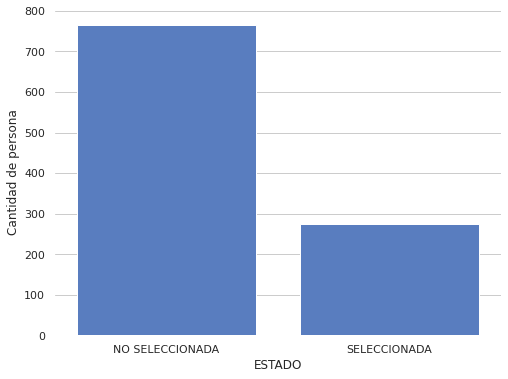

In [ ]:
plt.figure(figsize=(8,6))

sns.set_color_codes("muted")

sns.set_style('whitegrid')

g = sns.barplot(y="FOLIO", x="ESTADO", data=df_datos.groupby('ESTADO').count()['FOLIO'].reset_index(),
            label="SELECCIONADA", color="b")
sns.despine(left=True, bottom=True)
plt.ylabel('Cantidad de persona')

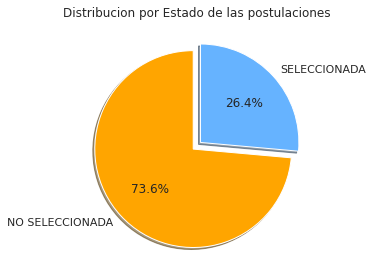

In [ ]:
# Pie chart
labels = list(df_datos.groupby('ESTADO').count()['FOLIO'].index)
sizes = list(df_datos.groupby('ESTADO').count()['FOLIO'].values)
#colors
colors = ['orange','#66b3ff']
#explsion
explode = (0.05,0.05)
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribucion por Estado de las postulaciones')
plt.tight_layout()
plt.show()

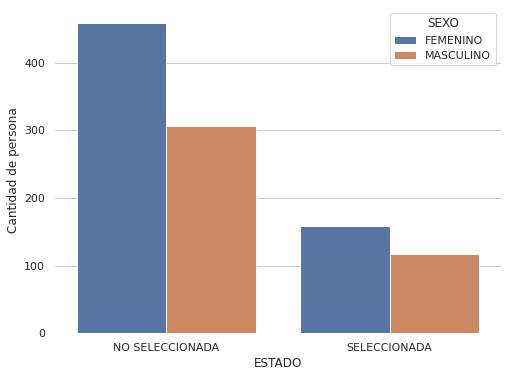

In [ ]:
plt.figure(figsize=(8,6))
sns.set()

sns.set_style('whitegrid')
sns.countplot(x= 'ESTADO', data = df_datos, hue = 'SEXO')
plt.ylabel('Cantidad de persona')
sns.despine(left=True, bottom=True)

In [ ]:
dummies = pd.get_dummies(df_datos['ESTADO'])
df_datos = pd.concat([df_datos, dummies], axis=1, sort=False)


# ***Revision por Universidades***


En esta seccion, se realizara un analisis por universidad de las postulaciones en Chile. Uno de los puntos importantes que quiero investigar es saber si hay universidades mas propensas a aceptar a mas postulantes que otros.  Espero poder obtener algunas resultados en esta linea de analisis




In [ ]:
def universidades_populares(n):
       
       #Tabla pivot
       pivot = df_datos.pivot_table(index=['INSTITUCION DE DESTINO'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['% Aceptados'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]

       #Grafico
       f, ax = plt.subplots(figsize=(10, 10))
       sns.set_color_codes("pastel")
       
       g = sns.barplot(y='INSTITUCION DE DESTINO', x="POSTULACIONES", data=pivot_n,
            label="POSTULACIONES", color="b")
       
       sns.set_color_codes("muted")
       g = sns.barplot(y="INSTITUCION DE DESTINO", x="SELECCIONADA", data=pivot_n,
            label="SELECCIONADA", color="b")

       
       # Agregar labels
       ax.legend(ncol=2, loc="lower right", frameon=True)
       
       plt.title('Radiografia de los {} universidades mas solicitadas en las postulaciones de BECAS'.format(n))
       plt.xticks(rotation=90)

       sns.despine(left=True, bottom=True)  

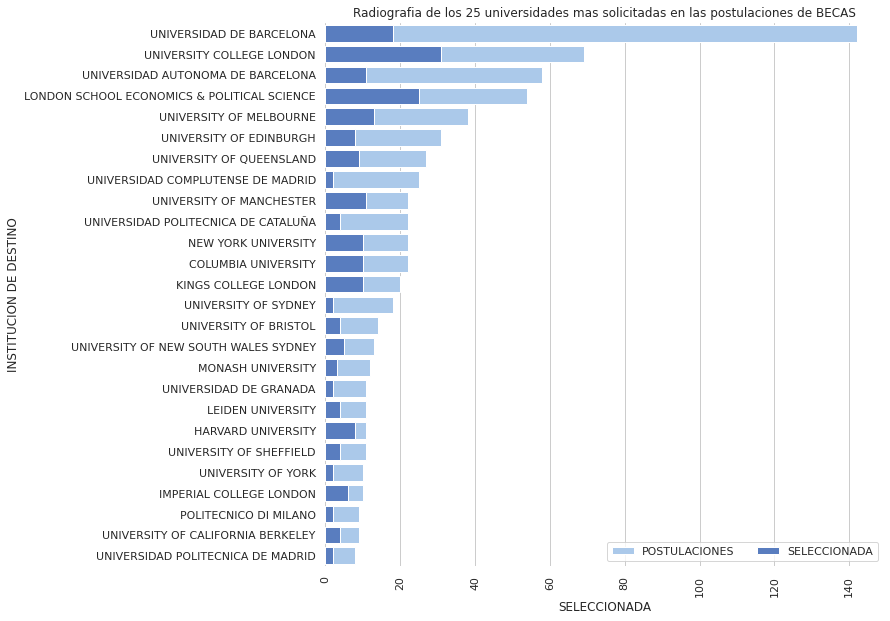

In [ ]:

universidades_populares(25)  

In [ ]:
def universidades_populares(n):
       
       import plotly.express as px

       #Tabla pivot
       pivot = df_datos.pivot_table(index=['INSTITUCION DE DESTINO'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['% Aceptados'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]
       
       #Grafico
       df = px.data.gapminder()
       fig = px.scatter(pivot_n, x="SELECCIONADA", y="% Aceptados",
	         size='POSTULACIONES', color="INSTITUCION DE DESTINO", template = 'none', color_discrete_sequence=px.colors.qualitative.G10,
                  size_max=70, title='Porcentaje de aceptacion de las {} Universidades con mas solicitudes'.format(n))
       #px.title('Nivel de Aceptacion de las {} Universidad mas solicitadas por los postulante a las Becas Chile'.format(n))
       fig.show()

universidades_populares(10)

# ***Revision por Paises***




En esta seccion, se realizara un analisis por paises, buscando analizar cuales son los paises mas solicitados por las becas, y si existen paises mas probables para poder obtener las becas del gobierno. Para poder hacer este trabajo, se incluye otro dataset con los paises de las universidades


In [ ]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mapeo_universidades.csv to mapeo_universidades (1).csv


In [ ]:
import io
universidad = pd.read_csv(io.BytesIO(uploaded['mapeo_universidades.csv']), sep =';')
# Dataset is now stored in a Pandas Dataframe

#universidad = universidad.iloc[:,1:3]
universidad.head()

,INSTITUCION DE DESTINO,country
0,BOSTON UNIVERSITY,USA
1,UNIVERSITY OF MELBOURNE,Australia
2,UNIVERSITY OF EDINBURGH,United Kingdom
3,UNIVERSITY OF SYDNEY,Australia
4,LANCASTER UNIVERSITY,United Kingdom


In [ ]:
df_datos = pd.merge(df_datos, universidad, how='left', on=['INSTITUCION DE DESTINO'])

In [ ]:
df_datos

,index,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,NO SELECCIONADA,SELECCIONADA,country,PUNTAJES_NUMERO
0,0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,1,0,USA,4.618
1,1,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,1,0,Brazil,4.617
2,2,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,1,0,Australia,4.615
3,3,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,1,0,United Kingdom,4.614
4,4,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,1,0,Australia,4.614
...,...,...,...,...,...,...,...,...,...,...
1008,1036,73200469.0,FEMENINO,RODRIGUEZ ORELLANA JOSEFINA MARIA EUGENIA,SELECCIONADA,UNIVERSITY OF CHICAGO,0,1,USA,4.620
1009,1037,73200540.0,FEMENINO,LANCELLOTTI QUEZADA LORETA PAZ,SELECCIONADA,NEW YORK UNIVERSITY,0,1,USA,4.620
1010,1038,73200119.0,FEMENINO,ECHIBURU TRUJILLO CONSTANZA SOFIA,SELECCIONADA,MCGILL UNIVERSITY,0,1,Canada,4.619
1011,1039,73200879.0,MASCULINO,MEGE DOMINGUEZ CRISTOBAL ENRIQUE,SELECCIONADA,UNIVERSITY OF QUEENSLAND,0,1,Australia,4.619


Se han encontrado postulaciones que tienen mas de dos universidades, por lo que, para no tener inconsistencia en la data, se ha decidio eliminar estos registros del analisis

In [ ]:
df_datos = df_datos.loc[df_datos['country'] != 'NO']

In [ ]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio


df_paises = df_datos.groupby('country').count()['FOLIO'].reset_index()

# 1) Infection Rates
fig_cases = go.Figure(data = go.Choropleth(locations = df_paises['country'],
                                     z = df_paises['FOLIO'],
                                     locationmode = 'country names',
                                     colorscale = 'Blues',
                                     colorbar_title = "Infections"))

fig_cases.update_layout(title_text = 'Cantidad de Postulante por pais',
                  geo = dict(showframe = False,
                           showcoastlines = False,
                           projection_type = 'equirectangular'))


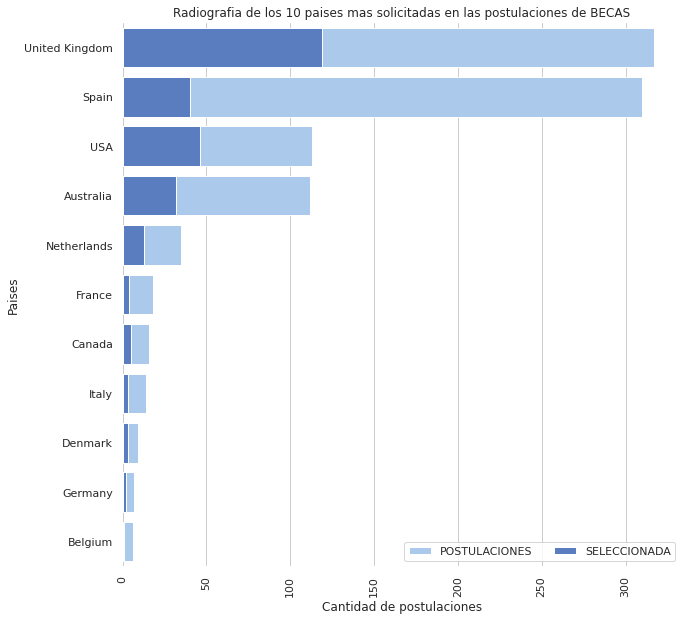

In [ ]:
def paises_populares(n):
       
       #Tabla pivot
       pivot = df_datos.pivot_table(index=['country'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['% Aceptados'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]

       #Grafico
       f, ax = plt.subplots(figsize=(10, 10))
       sns.set_color_codes("pastel")
       
       g = sns.barplot(y='country', x="POSTULACIONES", data=pivot_n,
            label="POSTULACIONES", color="b")
       
       sns.set_color_codes("muted")
       g = sns.barplot(y="country", x="SELECCIONADA", data=pivot_n,
            label="SELECCIONADA", color="b")

       
       # Agregar labels
       ax.legend(ncol=2, loc="lower right", frameon=True)
       
       plt.title('Radiografia de los {} paises mas solicitadas en las postulaciones de BECAS'.format(n))
       plt.xticks(rotation=90)
       plt.xlabel('Cantidad de postulaciones')
       plt.ylabel('Paises')
       sns.despine(left=True, bottom=True) 

paises_populares(10) 

In [ ]:
def paises_populares(n):
       
       import plotly.express as px

       #Tabla pivot
       pivot = df_datos.pivot_table(index=['country'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['% Aceptados'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]
       
       #Grafico
       df = px.data.gapminder()
       fig = px.scatter(pivot_n, x="SELECCIONADA", y="% Aceptados",
	         size='POSTULACIONES', color="country", template = 'none', color_discrete_sequence=px.colors.qualitative.G10,
                  size_max=70, title='Porcentaje de aceptacion de las {} paises con mas solicitudes a la BECAS de Magister'.format(n))
       #px.title('Nivel de Aceptacion de las {} Universidad mas solicitadas por los postulante a las Becas Chile'.format(n))
       fig.show()

paises_populares(10)

# ***Revision de Puntajes por paises y universidades***

In [ ]:
df_datos.head()

,index,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,NO SELECCIONADA,SELECCIONADA,country,PUNTAJES_NUMERO
0,0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,1,0,USA,4.618
1,1,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,1,0,Brazil,4.617
2,2,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,1,0,Australia,4.615
3,3,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,1,0,United Kingdom,4.614
4,4,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,1,0,Australia,4.614


In [ ]:
def string_numero():
    cantidad = 0
    valores = []
    resultado['PUNTAJE_NUMERO'] = 0
    for i in resultado['PUNTAJE']:
       numero = ''
       numero_lista = list(i)
       for x in numero_lista:
            if x != ',':
              numero = numero + x
        
       numero = float(numero)/1000
       #print(numero)
       #resultado['PUNTAJE_NUMERO'][cantidad] = numero
       valores.append(numero)
       cantidad = cantidad + 1
    
    valores = pd.DataFrame(valores, columns =['PUNTAJES_NUMERO'])
    return valores

In [ ]:
#resultado = pd.concat([resultado, df_puntajes], axis=1, sort=False)
#resultado

#resultado = resultado.reset_index()
#resultado = pd.concat([resultado, df_puntajes], axis=1, sort=False)
#resultado.drop('PUNTAJE', inplace = True, axis = 1)
#resultado.drop('PUNTAJE_NUMERO', inplace = True, axis = 1)

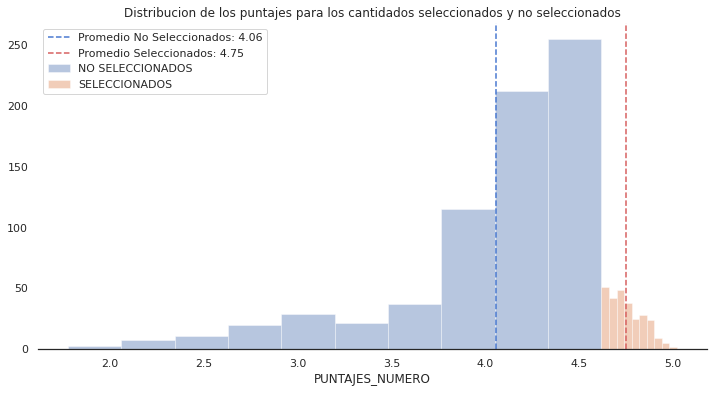

In [ ]:
def histograma_puntaje():

      plt.figure(figsize= (12,6))
      sns.set_style("white")

      #Histograma de los puntajes por seleccionados y no seleccionados
      sns.distplot(df_datos.loc[df_datos['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'], kde = False, bins = 10, label = 'NO SELECCIONADOS')
      sns.distplot(df_datos.loc[df_datos['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'], kde = False, bins = 10, label = 'SELECCIONADOS')
      
      #Promedio de puntaje por seleccionado y no seleccionados
      promedio_no = round(df_datos.loc[df_datos['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'].mean(),2)
      promedio_si = round(df_datos.loc[df_datos['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'].mean(),2)

      #Linea promedio para seleccionados y no seleccionados
      plt.axvline(x=df_datos.loc[df_datos['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'].mean(), color='b', linestyle='--', label = 'Promedio No Seleccionados: {}'.format(promedio_no))
      plt.axvline(x=df_datos.loc[df_datos['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'].mean(), color='r', linestyle='--', label = 'Promedio Seleccionados: {}'.format(promedio_si))

      plt.title('Distribucion de los puntajes para los cantidados seleccionados y no seleccionados')

      plt.legend()

      sns.despine(left=True,top = True,bottom = False)

histograma_puntaje()
    

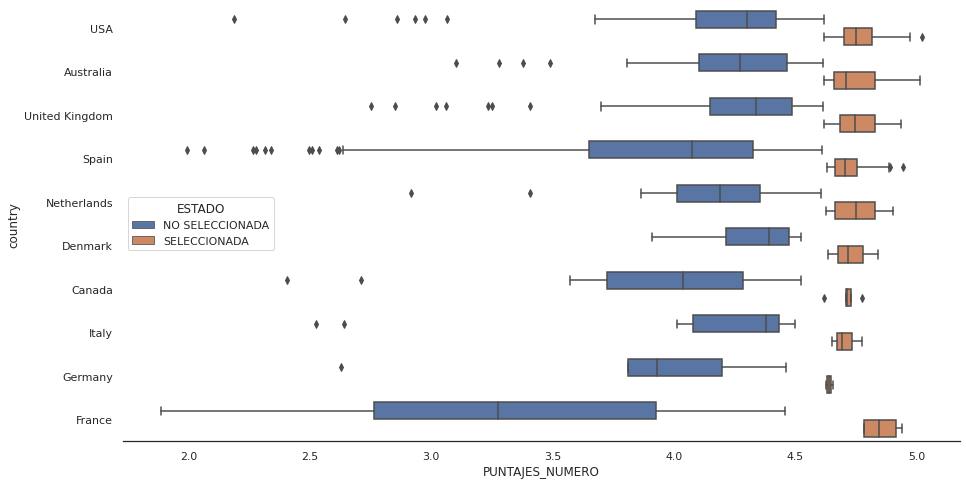

In [ ]:
paises_10 = list(df_datos.groupby('country').count()['FOLIO'].reset_index().sort_values(by='FOLIO', ascending = False)[:10]['country'])

df_datos = df_datos[df_datos['country'].isin(paises_10)]
plt.figure(figsize= (15,8))
sns.boxplot(x = 'PUNTAJES_NUMERO', y = 'country', hue = 'ESTADO', data = df_datos)
sns.despine(left=True,top = True,bottom = False)

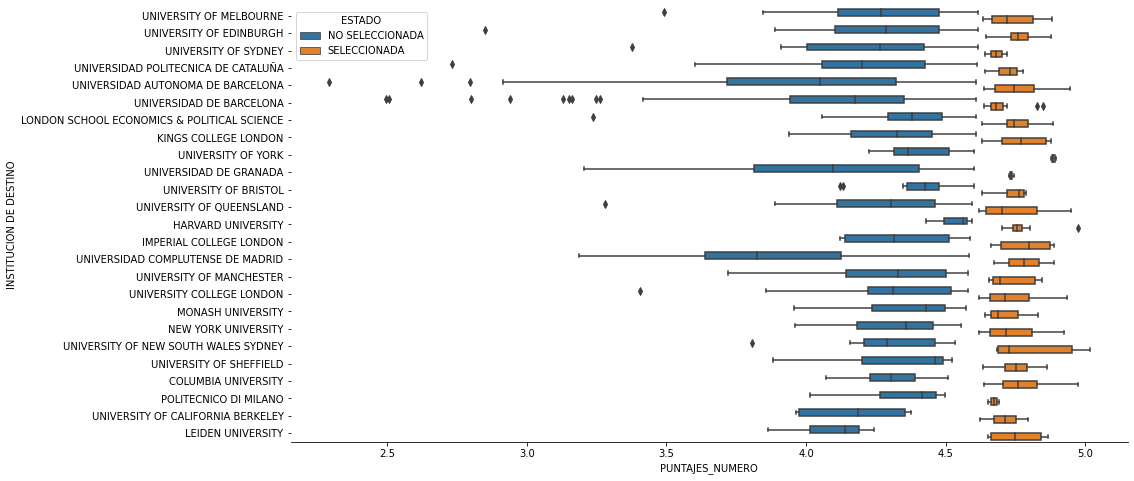

In [ ]:
def puntajes_universidades(n):

      universidad_n = list(resultado.groupby('INSTITUCION DE DESTINO').count()['FOLIO'].reset_index().sort_values('FOLIO', ascending = False)[:n+1]['INSTITUCION DE DESTINO'])
      
      resultado_n = df_datos[df_datos['INSTITUCION DE DESTINO'].isin(universidad_n)]

      plt.figure(figsize= (15,8))

      sns.boxplot(x = 'PUNTAJES_NUMERO', y = 'INSTITUCION DE DESTINO', hue = 'ESTADO', data = resultado_n)

      sns.despine(left=True,top = True,bottom = False)
      
puntajes_universidades(n)